# Regressão Logística

In [3]:
#install.packages("DMWR")

In [1]:
library(dplyr)
library(ggplot2)
library(plyr)
library(scales)
library(psych)
library(QuantPsyc)
library(DMwR)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'plyr' was built under R version 3.6.3"
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: 'psych'


The following objects are masked from 'package:scales':

In [2]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
5,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
6,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [3]:
df = data[data$CO_GRUPO == 13,]

In [4]:
dim(df)

[1] 9582  137

## Variáveis

In [7]:
df_1 = df %>% 
        dplyr::select(TP_PRES, TP_SEXO, NU_IDADE,CO_TURNO_GRADUACAO) %>% 
        setNames(c("presenca","genero", "idade", "turno"))

In [8]:
df_1$presenca = ifelse(df_1$presenca == 222,'ausente','presente')

In [25]:
table(df_1$presenca)


presente  ausente 
    8085     1497 

In [52]:
totalPresentes = length(which(df_1$presenca == "presente"))
totalAusentes = length(which(df_1$presenca == "ausente"))
total = totalPresentes + totalAusentes

propPresente = (totalPresentes / total)*100
propAusente = (totalAusentes / total)*100


In [55]:
cat("Presentes: ",round(propPresente,2), "%", "\n")
cat("Ausentes: ",round(propAusente,2), "%")

Presentes:  84.38 % 
Ausentes:  0.16 %

In [57]:
c1 = cor(df_1$genero, df_1$idade)
c2 = cor(df_1$genero, df_1$turno)
c3 = cor(df_1$idade, df_1$turno)

ERROR: Error in cor(df_1$genero, df_1$idade): 'x' must be numeric


In [10]:
df_1$turno = mapvalues(df_1$turno, from=c(1,2,3,4), to=c("matutino","vespetino",
                                                                "integral","noturno"))

In [11]:
head(df_1)

,presenca,genero,idade,turno
,<chr>,<fct>,<int>,<chr>
161,presente,F,28,noturno
162,presente,M,30,noturno
163,presente,M,29,noturno
164,presente,F,22,noturno
165,presente,M,47,noturno
166,presente,M,27,noturno


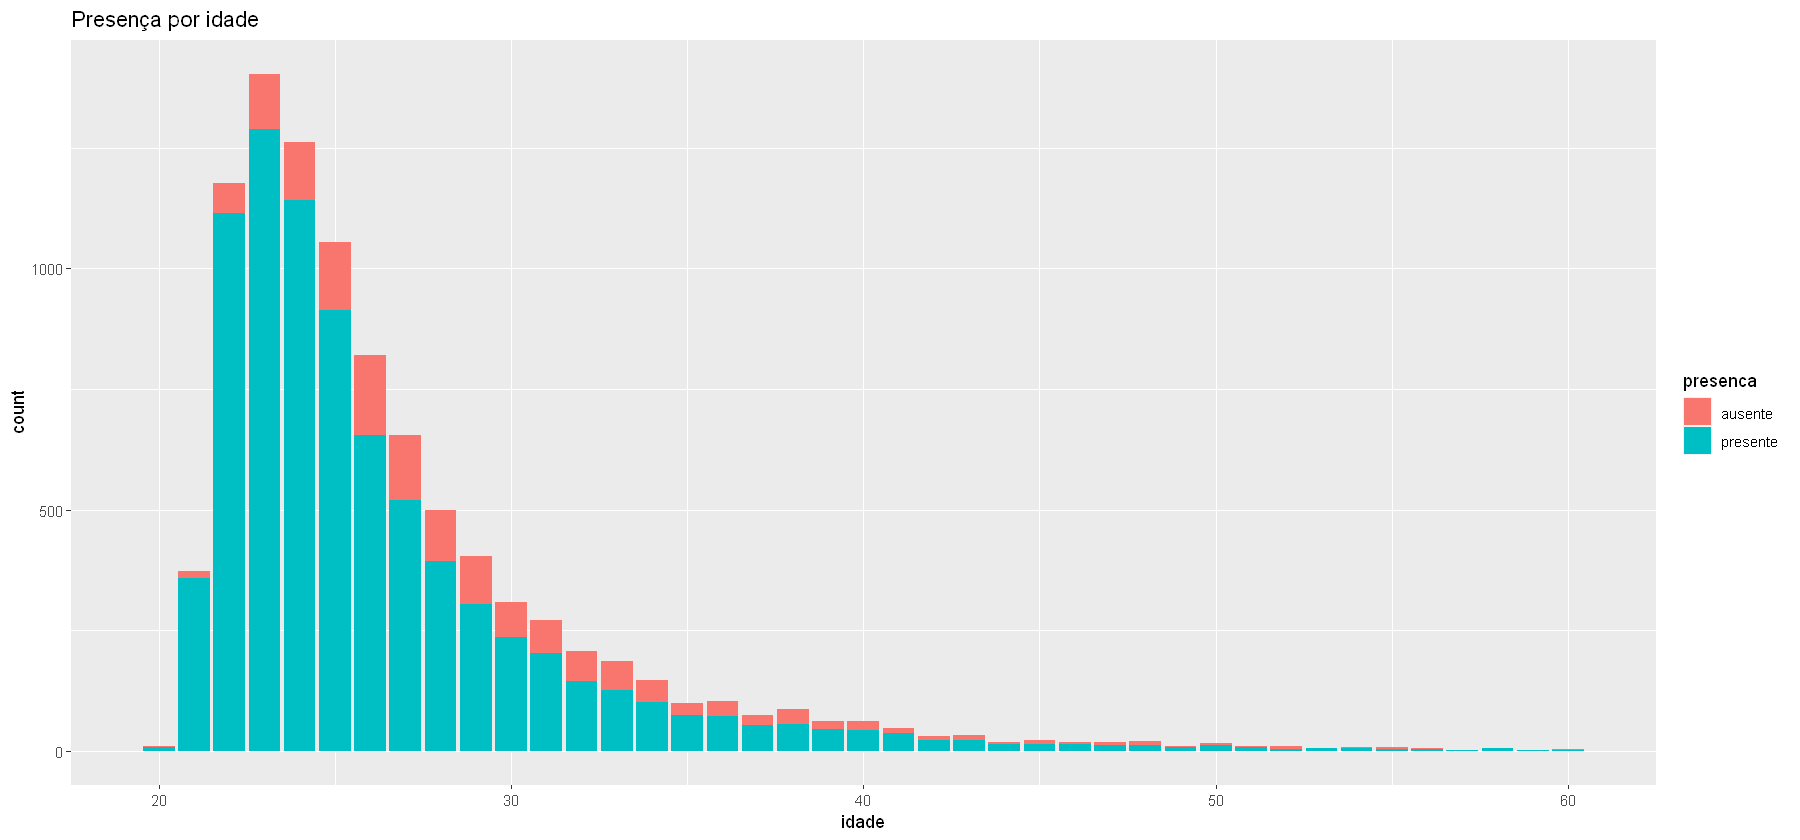

In [13]:
options(repr.plot.width = 15, repr.plot.height = 7)
df_idade = subset(df_1, idade<=60)
ggplot(df_idade, aes(x=idade, fill=presenca), width=0.8) +
       geom_bar() +
       #geom_text() +
       labs(title="Presença por idade")


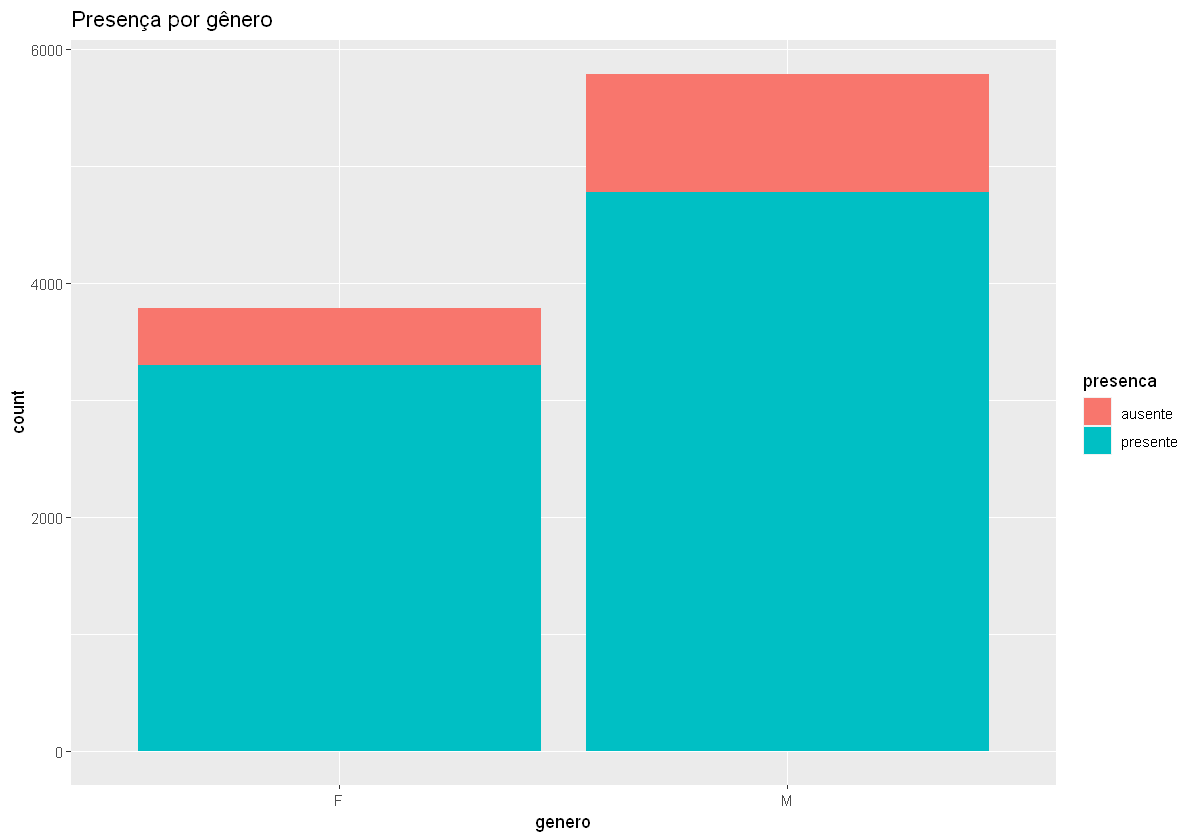

In [15]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(df_1, aes(x=genero, fill=presenca)) +
       geom_bar() +
       ##geom_text(aes(label = scales::percent(presenca)), position = position_stack(.5)) +
       labs(title="Presença por gênero")

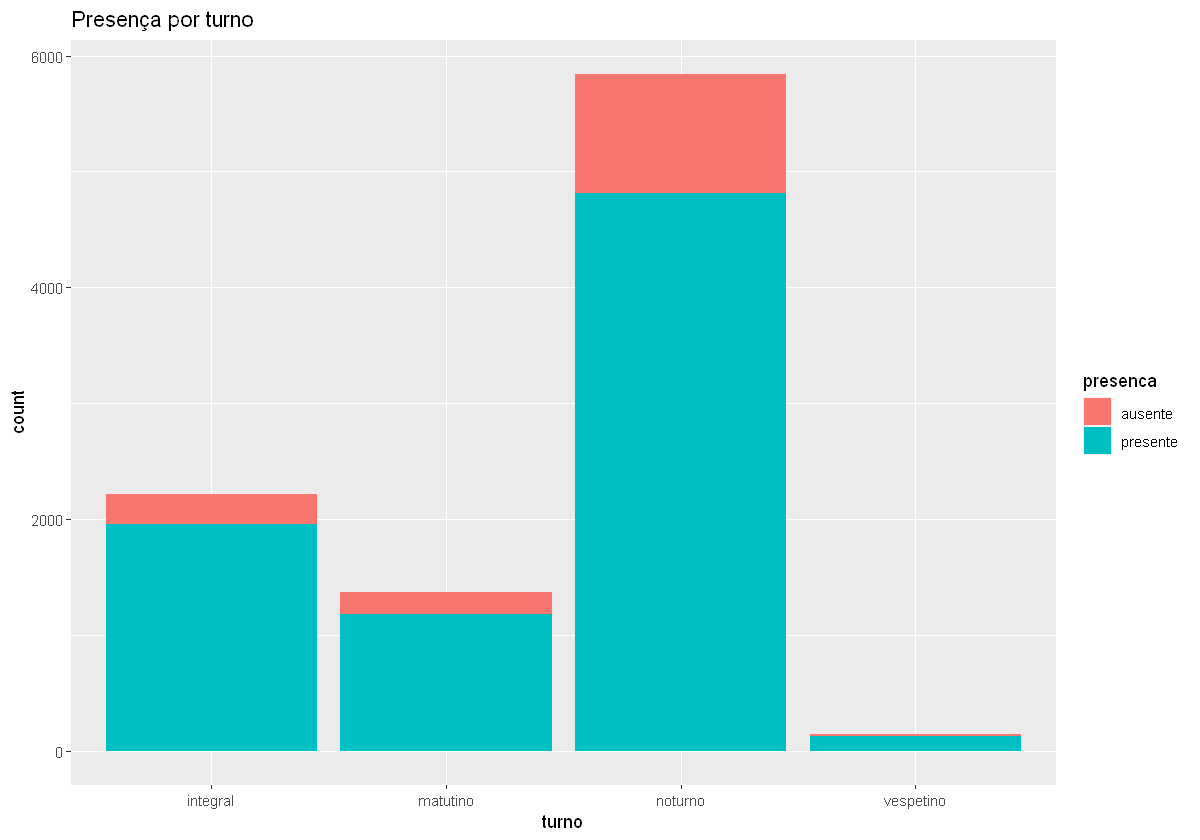

In [16]:
ggplot(df_1, aes(x=turno, fill=presenca)) +
       geom_bar() +
       #geom_text() +
       labs(title="Presença por turno")

In [82]:
prop.table(table(df_1$turno))


  integral   matutino    noturno  vespetino 
0.23158005 0.14287205 0.60989355 0.01565435 

In [17]:
df_1$presenca = as.factor(df_1$presenca)
df_1$turno = as.factor(df_1$turno)

In [18]:
head(df_1)

,presenca,genero,idade,turno
,<fct>,<fct>,<int>,<fct>
161,presente,F,28,noturno
162,presente,M,30,noturno
163,presente,M,29,noturno
164,presente,F,22,noturno
165,presente,M,47,noturno
166,presente,M,27,noturno


In [94]:
# Categorias de referência

In [19]:
levels(df_1$presenca)


[1] "ausente"  "presente"

In [20]:
df_1$presenca = relevel(df_1$presenca, ref="presente")
levels(df_1$presenca)

[1] "presente" "ausente"

In [21]:
levels(df_1$genero)

[1] "F" "M"

In [22]:
levels(df_1$turno)

[1] "integral"  "matutino"  "noturno"   "vespetino"

In [58]:
data(hacide)

Warning message in data(hacide):
"data set 'hacide' not found"


# Modelo 1

In [59]:
model_1 = glm(presenca~., data=df_1, family=binomial(link='logit'))

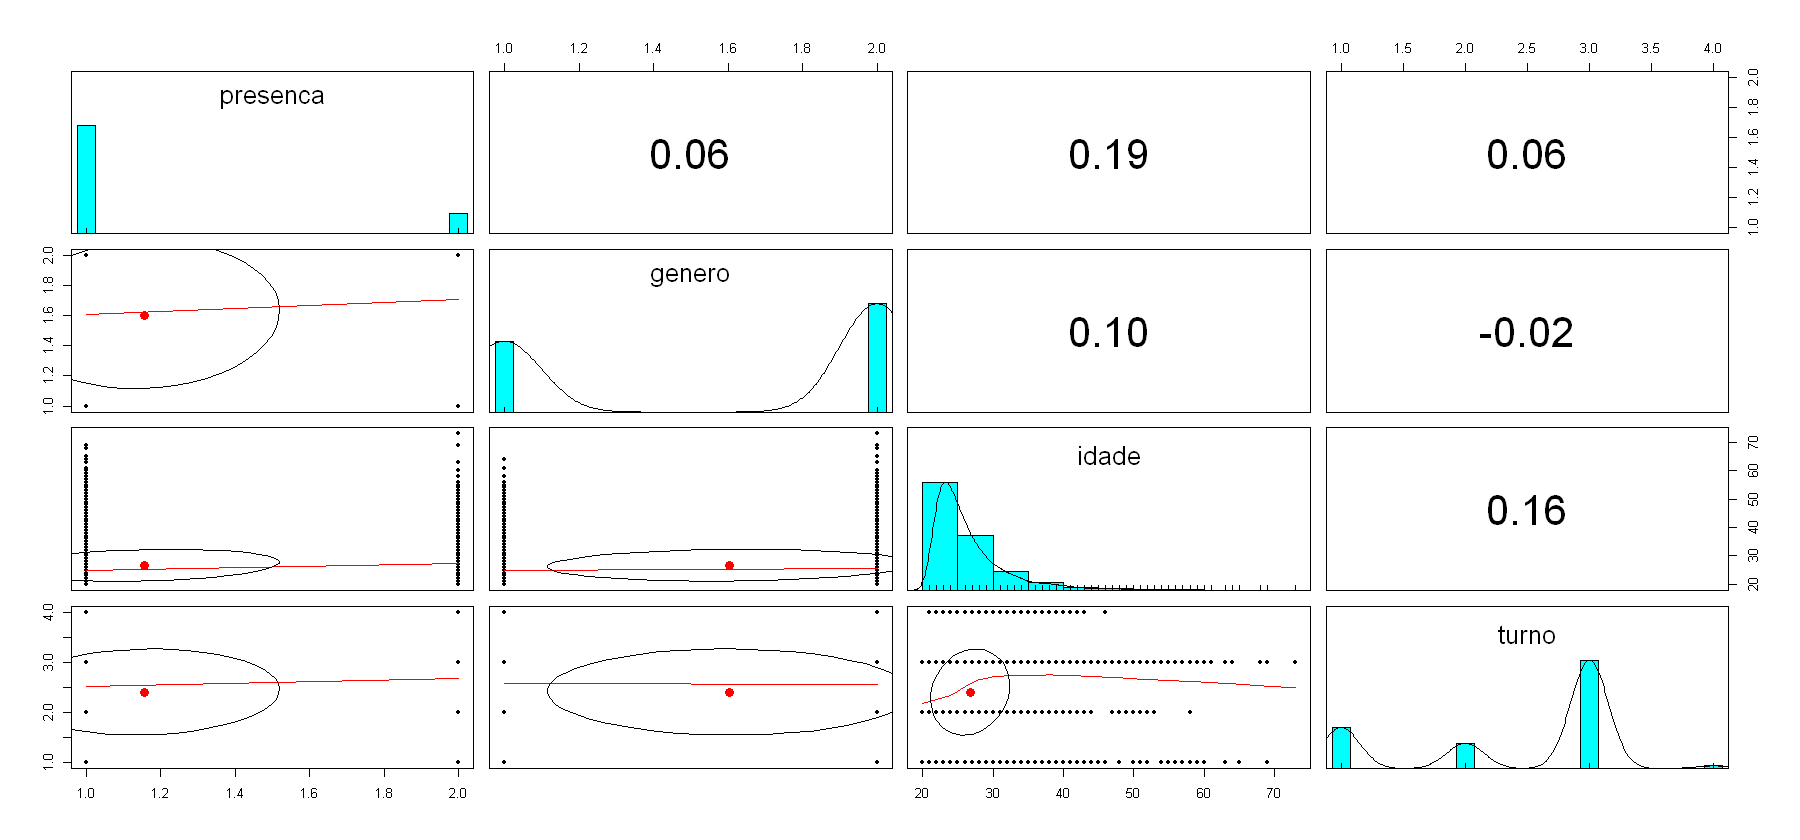

In [132]:
# Multicolinearidade
pairs.panels(df_1)

In [60]:
summary(model_1)


Call:
glm(formula = presenca ~ ., family = binomial(link = "logit"), 
    data = df_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8137  -0.5876  -0.5156  -0.4521   2.2969  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.04291    0.13793 -29.311  < 2e-16 ***
generoM         0.27093    0.06096   4.444 8.82e-06 ***
idade           0.07043    0.00435  16.193  < 2e-16 ***
turnomatutino   0.19380    0.10413   1.861   0.0627 .  
turnonoturno    0.34214    0.07623   4.488 7.19e-06 ***
turnovespetino -0.06641    0.26920  -0.247   0.8051    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8305.0  on 9581  degrees of freedom
Residual deviance: 7962.5  on 9576  degrees of freedom
AIC: 7974.5

Number of Fisher Scoring iterations: 4


In [63]:
exp(model_1$coefficients)

(Intercept)        generoM          idade  turnomatutino   turnonoturno 
    0.01754636     1.31118262     1.07297462     1.21384957     1.40795224 
turnovespetino 
    0.93574496

In [61]:
# Razão de chances
exp(cbind(OR = coef(model_1), confint.default(model_1)))

,OR,2.5 %,97.5 %
(Intercept),0.01754636,0.01338992,0.02299304
generoM,1.31118262,1.16351244,1.47759474
idade,1.07297462,1.06386632,1.08216089
turnomatutino,1.21384957,0.98975075,1.48868873
turnonoturno,1.40795224,1.21254546,1.63484965
turnovespetino,0.93574496,0.55209680,1.58598752


In [ ]:
# Genero: ser do sexo feminino diminui a chance de pertencer a categoria ausente. 
# A chance de uma pessoa do sexo feminino ser da categoria ausente é de 0.76 vezes menor que ser do sexo masculino e pertencer a categoria ausente
# Uma pessoa do sexo feminino tem 24% menos chance de faltar que um aluno do sexo masculino


In [74]:
# Matriz de confusão
ClassLog(model_1, df_1$presenca)

$rawtab
       resp
        presente ausente
  FALSE     8028    1474
  TRUE        57      23

$classtab
       resp
           presente     ausente
  FALSE 0.992949907 0.984635939
  TRUE  0.007050093 0.015364061

$overall
[1] 0.8402212

$mcFadden
[1] 0.04124749


In [71]:
# Previsão do modelo
prev = predict(model_1, newdata=df_1, type="response")


In [73]:
#plot(sort(prev))

In [77]:
prev = prev >= 0.5


In [141]:
# Avaliação da performance/matriz de confusão
conf = table(prev_, df_1[[1]])
conf


       
prev_   presente ausente
  FALSE     8028    1474
  TRUE        57      23

In [69]:
logit = mean(dlogis(predict(model_1,type="link")))
logit * coef(model_1)

(Intercept)        generoM          idade  turnomatutino   turnonoturno 
  -0.510277404    0.034195480    0.008889959    0.024460142    0.043182883 
turnovespetino 
  -0.008382259

In [78]:
conf = table(prev, df_1[[1]])
conf
tx_acerto = (conf[1] + conf[4]) / sum(conf)
tx_acerto

       
prev    presente ausente
  FALSE     8028    1474
  TRUE        57      23

[1] 0.8402212

# Modelo 2

In [70]:
logit = mean(dnorm(predict(model_2,type="link")))
logit * coef(model_2)

(Intercept)        generoM          idade  turnomatutino   turnonoturno 
  -0.547031532    0.032890733    0.009704114    0.023567586    0.041456665 
turnovespetino 
  -0.008849306

In [64]:
model_2 = glm(presenca~., data=df_1, family=binomial(link='probit'))


In [65]:
summary(model_2)


Call:
glm(formula = presenca ~ ., family = binomial(link = "probit"), 
    data = df_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8109  -0.5836  -0.5069  -0.4417   2.3302  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.397964   0.077463 -30.956  < 2e-16 ***
generoM         0.144180   0.033162   4.348 1.38e-05 ***
idade           0.042539   0.002561  16.612  < 2e-16 ***
turnomatutino   0.103311   0.055764   1.853   0.0639 .  
turnonoturno    0.181729   0.040848   4.449 8.63e-06 ***
turnovespetino -0.038792   0.141807  -0.274   0.7844    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8305.0  on 9581  degrees of freedom
Residual deviance: 7946.3  on 9576  degrees of freedom
AIC: 7958.3

Number of Fisher Scoring iterations: 4


In [66]:
exp(cbind(OR = coef(model_2), confint.default(model_2)))

,OR,2.5 %,97.5 %
(Intercept),0.09090283,0.07809809,0.105807
generoM,1.15509157,1.08240361,1.232661
idade,1.04345664,1.03823256,1.048707
turnomatutino,1.10883590,0.99403382,1.236897
turnonoturno,1.19928937,1.10701733,1.299252
turnovespetino,0.96195100,0.72852903,1.270162


In [75]:
ClassLog(model_2, df_1$presenca)

$rawtab
       resp
        presente ausente
  FALSE     8028    1474
  TRUE        57      23

$classtab
       resp
           presente     ausente
  FALSE 0.992949907 0.984635939
  TRUE  0.007050093 0.015364061

$overall
[1] 0.8402212

$mcFadden
[1] 0.04319941


In [79]:
prev_ = predict(model_2, newdata=df_1, type="response")
prev_ = prev >= 0.5

In [80]:
conf_ = table(prev_, df_1[[1]])
conf_
tx_acerto_ = (conf_[1] + conf_[4]) / sum(conf_)
tx_acerto_

       
prev_   presente ausente
  FALSE     8028    1474
  TRUE        57      23

[1] 0.8402212

# Previsão

In [82]:
head(df_1)

,presenca,genero,idade,turno
,<fct>,<fct>,<int>,<fct>
161,presente,F,28,noturno
162,presente,M,30,noturno
163,presente,M,29,noturno
164,presente,F,22,noturno
165,presente,M,47,noturno
166,presente,M,27,noturno


In [86]:
df_nw = data.frame(genero=c("F","M"),
                  idade=c(28,28),
                  turno=c("noturno","noturno"))
df_nw

genero,idade,turno
<fct>,<dbl>,<fct>
F,28,noturno
M,28,noturno


In [89]:
predict_ = predict(model_1, newdata=df_nw, type="response")
predict_ 

1         2 
0.1507671 0.1888242